In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
from os import *
import re
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import collections
import random

In [ ]:
dirname = '/scratch-shared/bbbc021v1_images/*.png'
im = []

for f in glob.glob(dirname):
    img    = cv2.imread(f) 
    img    = np.array(img)
    #img = img.astype('float32')
    
    im.append(img)

In [ ]:
im[0].shape

In [ ]:
#x_orig = np.reshape(im, (len(im), 256,256))

In [ ]:
i = im[0]
#i = i/255.
plt.imshow(i)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(i)

In [45]:
im = []
path = '/scratch-shared/kensert_data/Week1_22123/*.tif'

for i in glob.glob(path):
    
    image = Image.open(i)
    #image    = cv2.imread(i,1)
    
    image = np.array(image)
    
    #image = image.astype('uint8')
    
    im.append(image)


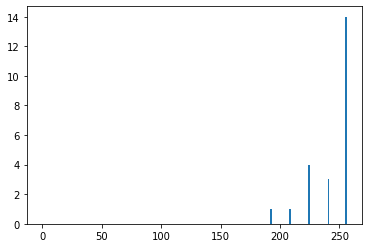

In [46]:
l = im[700]
plt.hist(l.ravel(),256,[0,256]) 
plt.show() 

In [35]:
l.shape

(1024, 1280, 3)

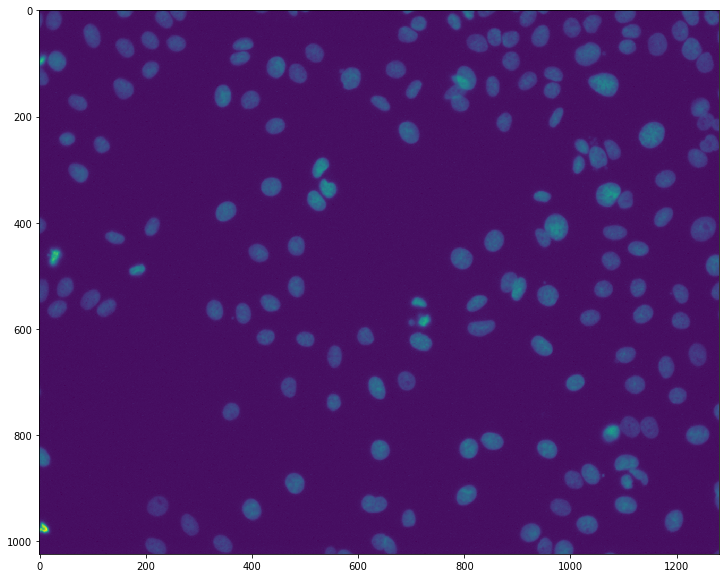

In [47]:
plt.figure(figsize=(20,10))
plt.imshow(l)

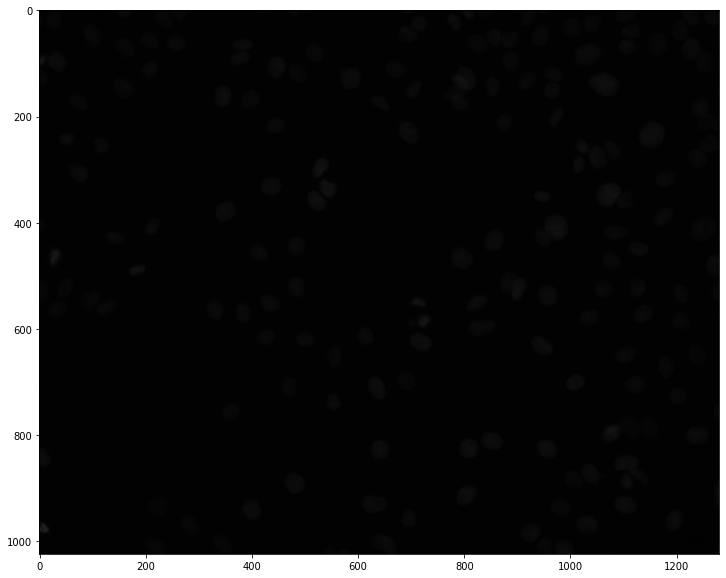

In [40]:
s = cv2.pyrMeanShiftFiltering(l, 0, 0)

plt.figure(figsize=(20,10))
plt.imshow(s)

In [41]:
gray = cv2.cvtColor(s,cv2.COLOR_BGR2GRAY)

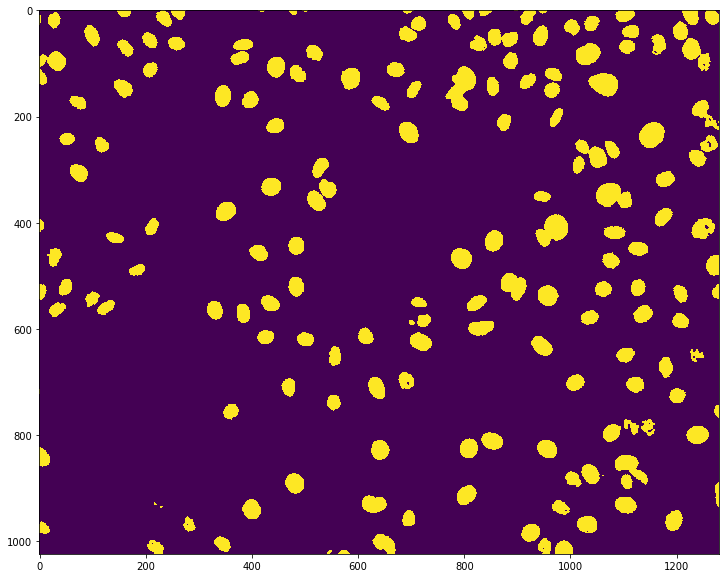

In [42]:
t = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.figure(figsize=(20,10))
plt.imshow(t)

In [43]:
D = ndimage.distance_transform_edt(t)
localMax = peak_local_max(D, indices=False, min_distance=9, labels=t)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=t)

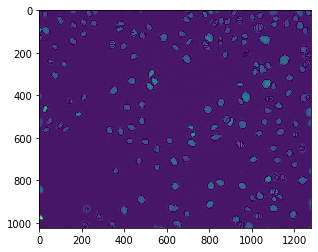

In [49]:
cx = []
cy = []
for label in np.unique(labels):
    if label == 0:
        continue
        
    
    mask = np.zeros(gray.shape, dtype='uint8')
    mask[labels == label] = 255
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    ((x, y), r) = cv2.minEnclosingCircle(c)
    #rad.append(r)
    cx.append(int(x))
    cy.append(int(y))
    
    cv2.circle(l, (int(x), int(y)), int(r), (255, 0, 0), 2)
    cv2.drawContours(l, [c], -1,(0, 255, 0), 2)
    
   
    
plt.imshow(l)
#plt.savefig('cropped.png')
#cv2.imwrite('/home/jovyan/noise.png',img)